In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyccl as ccl
import os
import getdist
from getdist import plots, MCSamples
%matplotlib inline

In [2]:
names_planck  = ['ns', 'h', 'Ωm', 'Ωb', 's8']
labels_planck = [r'n_s', r'h', r'\Omega_{\rm{m}}', 
                 r'\Omega_{\rm{b}}', r'\sigma_{\rm{8}}']

planck1 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

planck_params = []
for item in planck_tot:
    planck_params.append([item[7], item[29]/100, item[31], item[2]/(item[29]/100)**2, item[34]])
planck_params = np.array(planck_params)
planck_samples = MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [4]:
path = '/home/jaime/PhD/LimberJack.jl/chains/'
DES_MH = pd.read_csv(path+'DES_MH/chain_2022-04-06T21%3A35%3A53.700.csv')

In [9]:
labels_dict = {'b1': 'b_1',
               'b2': 'b_2',
               'b3': 'b_3',
               'b4': 'b_4',
               'b5': 'b_5',
               'ns': 'n_s',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               's8': '\sigma_8',
               'S8': 'S_8'}
names_All = ['b1', 'b2', 'b3', 'b4', 'b5', 'ns', 'h', 'Omega_m', 'Omega_b', 's80', 'S80']
ranges = None #{'h': (0.6, 0.8), 'Ωm':(0.1, 0.5),  's8': (0.7, 1.0)}

In [10]:
def make_samples(file, names, rangess, label):
    namess = []
    labels = []
    samples = []
    for name in names:
        if name in np.array(file.keys()):
            namess.append(name) 
            labels.append(labels_dict[name]) 
            samples.append(np.array(file[name]))
    return MCSamples(samples=samples, names=namess, labels=labels, label=label, ranges=rangess,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.2, 'smooth_scale_1D':0.2})

In [11]:
DES_MH_samples = make_samples(DES_MH, ['b1', 'b2', 'b3', 'b4', 'b5', 'h', 'Ωm', 's8'], ranges, 'DES_MH')

Removed no burn in


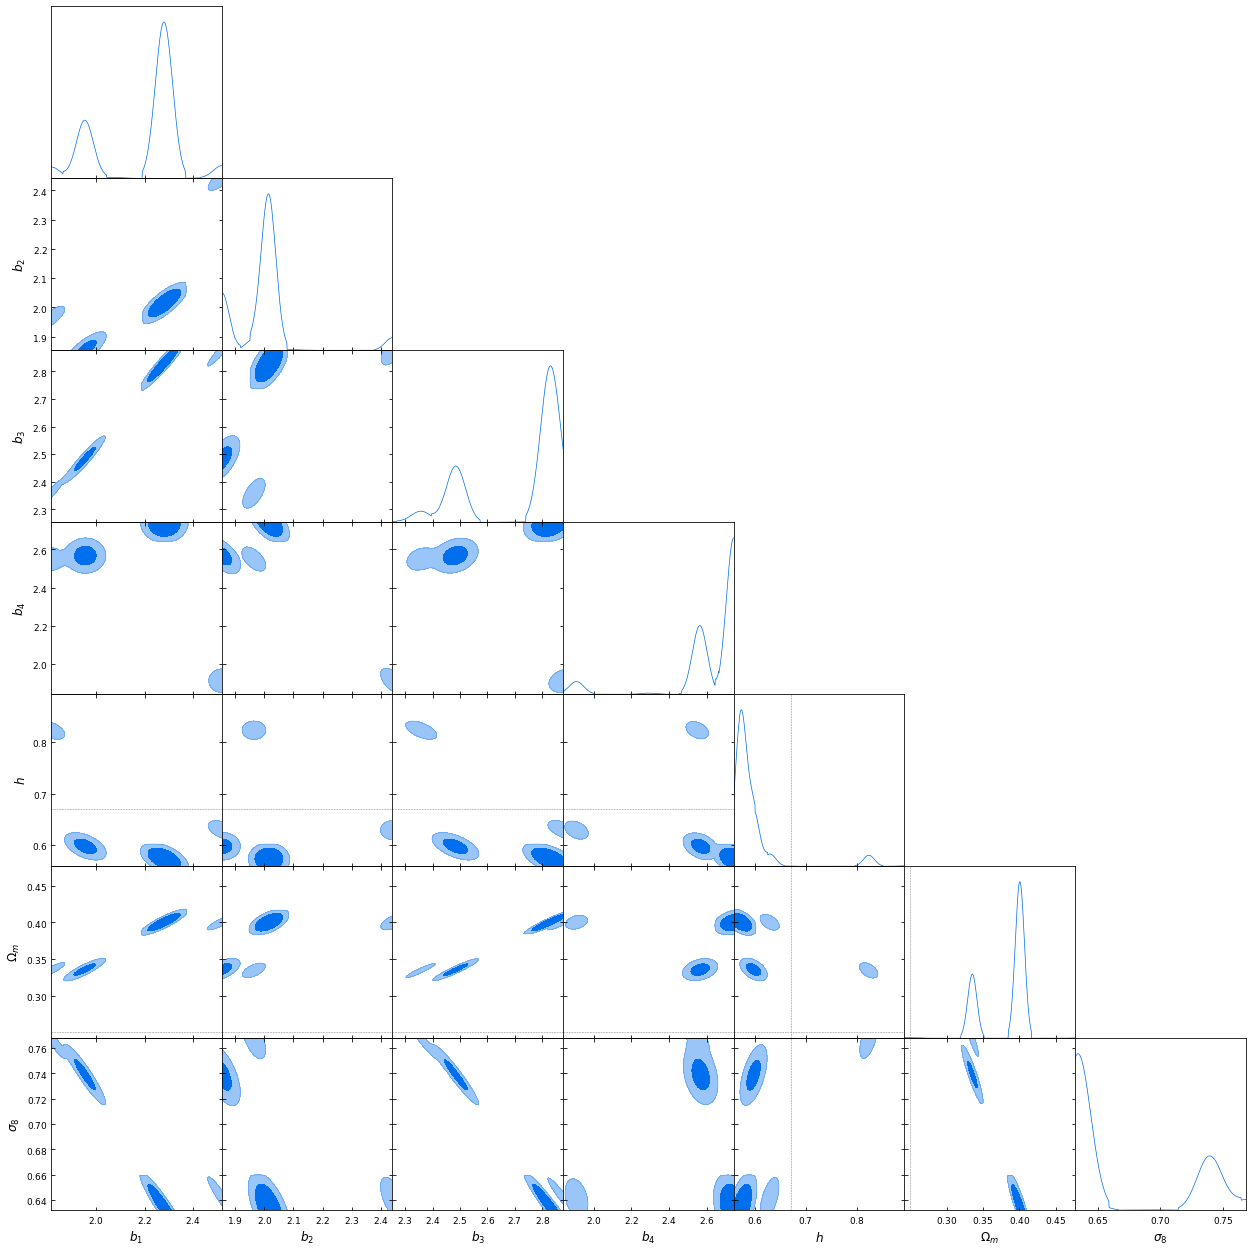

In [12]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(DES_MH_samples, filled=True,
                markers={'h': 0.67,
                         'Ωm': 0.25,
                         's8': 0.81})